# Python Import for Gorgon Output

This is a guide for using the python tools developed for Gorgon. It covers:
* Importing `pvti` files into `numpy` arrays
* Running python analysis on `CX1`

The modules containing these tools are in the `magnetosphere` module.

The Gorgon import part needs the python vtk module, which can be easily downloaded using Anaconda with the command: `conda install -c clinicalgraphics vtk`

Modules needed for this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
latex = lambda x: '$\mathsf{'+x+'}$'

Add the `magnetosphere` module to PATH:

In [2]:
import sys
path_to_module = 'C:/Users/Lars/OneDrive - Imperial College London/Code/'
if path_to_module not in sys.path:
    sys.path.append(path_to_module)

# Importing Gorgon pvti files

This is a quick guide on how to use the pvti import for Python.

It will read the `.pvti` file format generated by Gorgon, and place them into numpy arrays.

The functions are all defined in a class called `gorgon_sim`, located in `magnetosphere.gorgon_import`:

In [3]:
path_to_data = r'C:\Users\Lars\OneDrive - Imperial College London\Code\Shared\sample_data'

In [4]:
from magnetosphere.gorgon.gorgon_import import gorgon_sim

There are two ways to use this: 
1. using the whole class with 'helper' functions
2. using the import function by itself

## Using the whole class

This is aimed at making importing a simulation and changing timestep relatively easy.

First, you must specify the folder in which all the `.pvti` files are stored.

From there, you can initiate the class:

In [5]:
sim = gorgon_sim(path_to_data)

This imports the relevant simulation parameters:

In [6]:
print('No of cells: ', len(sim.x), len(sim.y), len(sim.z))
print('Spacing: ', sim.d)
print('Centre: ', sim.xc)
print('Variables available to import: ', sim.arr_names)
print('Available timesteps: ', sim.times)
print('Vertex centred x array: ', sim.x)

No of cells:  200 120 160
Spacing:  [ 0.5  0.5  0.5]
Centre:  [ 20.  30.  40.]
Variables available to import:  ['Avec' 'Bvec_c' 'Te' 'Ti' 'jvec' 'rho1' 'vvec']
Available timesteps:  ['6600' '7200']
Vertex centred x array:  [-20.  -19.5 -19.  -18.5 -18.  -17.5 -17.  -16.5 -16.  -15.5 -15.  -14.5
 -14.  -13.5 -13.  -12.5 -12.  -11.5 -11.  -10.5 -10.   -9.5  -9.   -8.5
  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5  -4.   -3.5  -3.   -2.5
  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5   2.    2.5   3.    3.5
   4.    4.5   5.    5.5   6.    6.5   7.    7.5   8.    8.5   9.    9.5
  10.   10.5  11.   11.5  12.   12.5  13.   13.5  14.   14.5  15.   15.5
  16.   16.5  17.   17.5  18.   18.5  19.   19.5  20.   20.5  21.   21.5
  22.   22.5  23.   23.5  24.   24.5  25.   25.5  26.   26.5  27.   27.5
  28.   28.5  29.   29.5  30.   30.5  31.   31.5  32.   32.5  33.   33.5
  34.   34.5  35.   35.5  36.   36.5  37.   37.5  38.   38.5  39.   39.5
  40.   40.5  41.   41.5  42.   42.5  43.   43.

### Importing a timestep
Let's import the 1st timestep. This imports all the available variables, e.g. $\rho$, $\vec{v}$, etc.:

In [7]:
sim.import_timestep(0)

This stores all the new arrays into a dictionary stored in `sim.arr`, with the same name as its filename.

From this, we can plot using `matplotlib`

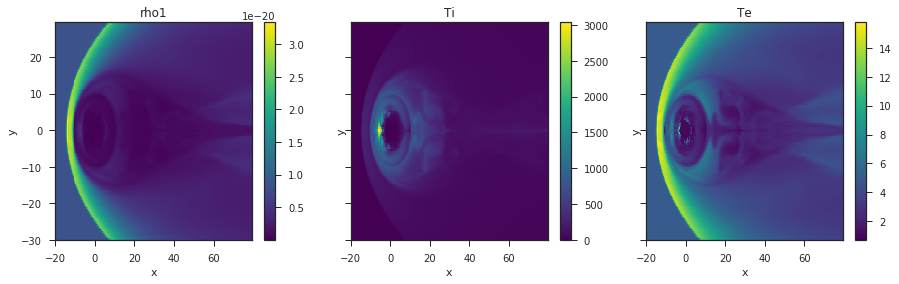

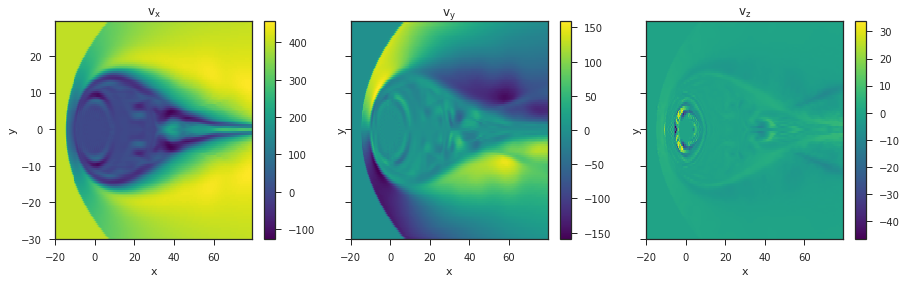

In [8]:
iz = int(0.5*len(sim.z))
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
for axi, s in zip(ax, ['rho1', 'Ti', 'Te']):
    p = axi.pcolormesh(sim.x, sim.y, sim.arr[s][:, :, iz].T)
    axi.set(xlabel='x', ylabel='y', title=s)
    plt.colorbar(p, ax=axi)

fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
for i, c in enumerate(zip(ax, ['x', 'y', 'z'])):
    axi = c[0]
    c = c[1]
    p = axi.pcolormesh(sim.x, sim.y, sim.arr['vvec'][:, :, iz, i].T/1e3)
    axi.set(xlabel='x', ylabel='y', title=latex('v_'+c))
    plt.colorbar(p, ax=axi)
plt.show()

### Importing only one variable from one timestep

For speed/memory considerations, you may only want to import one variable, e.g. $\vec{B}$:

In [9]:
sim.import_timestep(0, arr_names=['Bvec_c']) 
# This will only import Bvec_c and delete the other variables

Example plot of $\left|\vec{B}\right|$ in log space:

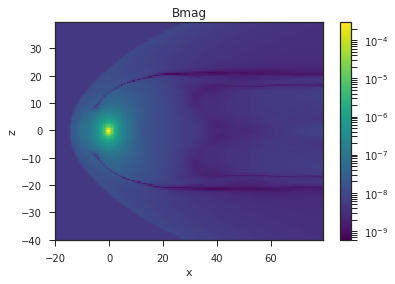

In [10]:
sim.arr['Bmag'] = np.sqrt(np.sum(sim.arr['Bvec_c']**2, axis=-1))

import matplotlib.colors as mcolors
    
iy = int(0.5*len(sim.y))
fig, ax = plt.subplots()
p = ax.pcolormesh(sim.x, sim.z, sim.arr['Bmag'][:, iy, :].T, norm=mcolors.LogNorm())
ax.set(xlabel='x', ylabel='z', title='Bmag')
plt.colorbar(p)

plt.show()

### Dealing with multiple timesteps

To import timesteps sequentially, this is easily done with a loop over the array `sim.times` (containts all the available timesteps).

Here's an example, where it imports $\rho$ and $\vec{v}$ for each timestep, and plots the sub-solar line ($y=z=0$) on the same plot:

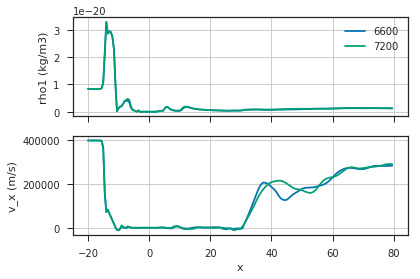

In [11]:
var_list = ['rho1', 'vvec'] # Variables to be imported

iz = int(0.5*len(sim.z))
iy = int(0.5*len(sim.y))

fig, ax = plt.subplots(2, 1, sharex=True)
for it, ct in enumerate(sim.times): # Loop over each timestep
    sim.import_timestep(it, arr_names=var_list) # Import the timestep
    
    ax[0].plot(sim.x, sim.arr['rho1'][:, iy, iz]) # Plot the sub-solar line
    ax[1].plot(sim.x, sim.arr['vvec'][:, iy, iz, 0])
    
ax[0].set(ylabel='rho1 (kg/m3)')
ax[1].set(ylabel='v_x (m/s)', xlabel='x')
ax[0].legend(sim.times)

plt.show()

## Using the file import

If you prefer to keep it simple, you can always use the basic import function which loads a `pvti` file directly into numpy

Here's an example:

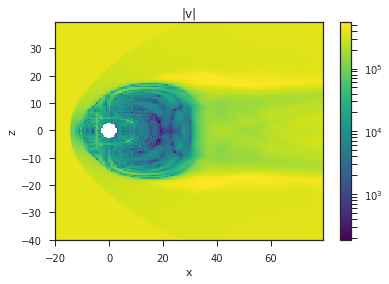

In [12]:
sim2 = gorgon_sim()

# Import the space
sim2.import_space(path_to_data+'/x27_vvec-7200.pvti')

# Import the vvec array
sim2.import_vtk(path_to_data+'/x27_vvec-7200.pvti', 'vvec') # Path to file
sim2.arr['vmag'] = np.sqrt(np.sum(sim2.arr['vvec']**2, axis=-1))

iy = int(0.5*sim2.arr['vmag'].shape[1])
fig, ax = plt.subplots()
p = ax.pcolormesh(sim2.x, sim2.z, sim2.arr['vmag'][:, iy, :].T, norm=mcolors.LogNorm())
ax.set(xlabel='x', ylabel='z', title='|v|')
plt.colorbar(p)

plt.show()